<a href="https://colab.research.google.com/github/weensirin/deepLearningHomework/blob/main/Banking_Dataset_Marketing_Targets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Import Library
# data analysis
import numpy as np
import pandas as pd
import time
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# machine learning only sklearn for this rule
import sklearn.linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.svm import SVC
#from imblearn.over_sampling import RandomOverSampler, SMOTE
#from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Data
df_alldata = pd.read_csv('https://raw.githubusercontent.com/pakkardkaw/deepLearningHomework/main/train.csv',delimiter=';')

In [ ]:
df_alldata.shape

(45211, 17)

In [ ]:
df_alldata=df_alldata.dropna(axis=0)

In [ ]:
df_alldata.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [ ]:

#Encode Catagorical data
df_alldata['job']=df_alldata['job'].map({
                                                    'admin.':0,
                                                    'blue-collar':1,
                                                    'entrepreneur':2,
                                                    'housemaid':3,
                                                    'management':4,
                                                    'retired':5,
                                                    'self-employed':6,
                                                    'services':7,
                                                    'student':8,
                                                    'technician':9,
                                                    'unemployed':10,
                                                    'unknown':11
                                                    })

df_alldata['marital']=df_alldata['marital'].map({
                                                                'divorced':0,
                                                                'married':1,
                                                                'single':2
                                                                })

df_alldata['education']=df_alldata['education'].map({
                                                                'primary':0,
                                                                'secondary':1,
                                                                'tertiary':2,
                                                                'unknown':3
                                                                })

df_alldata['default']=df_alldata['default'].map({
                                                                'no':0,
                                                                'yes':1
                                                                })

df_alldata['housing']=df_alldata['housing'].map({
                                                                'no':0,
                                                                'yes':1
                                                                })

df_alldata['loan']=df_alldata['loan'].map({
                                                                'no':0,
                                                                'yes':1
                                                                })

df_alldata['contact']=df_alldata['contact'].map({
                                                                'cellular':0,
                                                                'telephone':1,
                                                                'unknown':2
                                                                })


df_alldata['month']=df_alldata['month'].map({
                                                    'jan':0,
                                                    'feb':1,
                                                    'mar':2,
                                                    'apr':3,
                                                    'may':4,
                                                    'jun':5,
                                                    'jul':6,
                                                    'aug':7,
                                                    'sep':8,
                                                    'oct':9,
                                                    'nov':10,
                                                    'dec':11
                                                    })

df_alldata['poutcome']=df_alldata['poutcome'].map({
                                                                'failure':0,
                                                                'other':1,
                                                                'success':2,
                                                                'unknown':3
                                                                })

df_alldata['y']=df_alldata['y'].map({
                                                                'no':0,
                                                                'yes':1
                                                                })

# Remove Catagorical columns
df_alldata=df_alldata.select_dtypes([np.number])






# EDA 

In [ ]:
df_alldata.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
y            int64
dtype: object

In [ ]:
for x_col in df_alldata.columns:
  fig = px.histogram(df_alldata, x=x_col, color="y",title="x_col")
  fig.show()




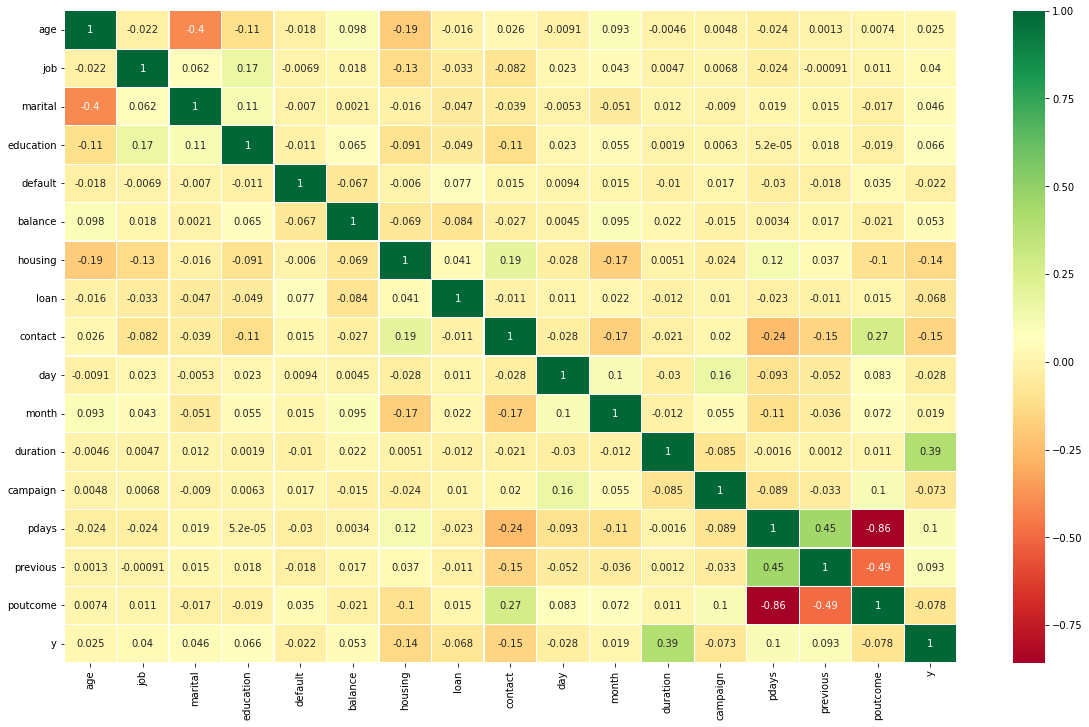

In [ ]:
sns.heatmap(df_alldata.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [ ]:
#Split Train Test Data
from sklearn.model_selection import train_test_split
x_all=df_alldata
y_all=df_alldata[['y']]

x_train, x_test, y_train, y_test = train_test_split(x_all, y_all,test_size=0.2,stratify=y_all,random_state=1)


#Explore Train & Test

for x_col in x_train.columns:
    fig = px.histogram(x_train, x=x_col, color="y",title="Train")
    fig.show()
    fig = px.histogram(x_test, x=x_col, color="y",title="Test")
    fig.show()


x_train=x_train.drop('y',axis=1)
x_test=x_test.drop('y',axis=1)

In [ ]:
#Normalize data

scaler = StandardScaler()  
scaler.fit(x_train) 
x_train = scaler.transform(x_train) 

In [ ]:
x_test = scaler.transform(x_test)

#Train and Test Machine Learning Models

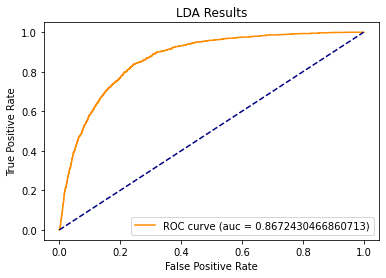

LDA Accuracy =0.8893066460245493
LDA--- 0.2562592029571533 seconds ---


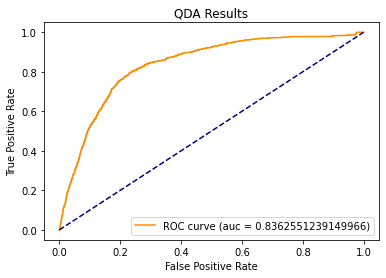

QDA Accuracy =0.8561318146632755
QDA--- 0.1564197540283203 seconds ---


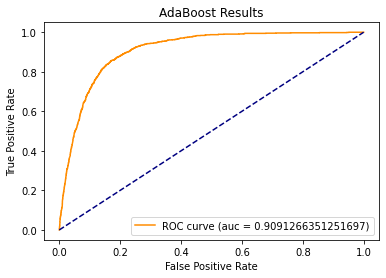

AdaBoost Accuracy =0.8960521950680084
AdaBoost--- 3.3012051582336426 seconds ---


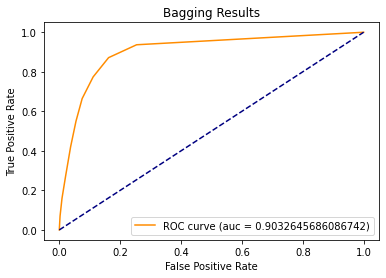

Bagging Accuracy =0.8993696782041358
Bagging--- 1.601241111755371 seconds ---


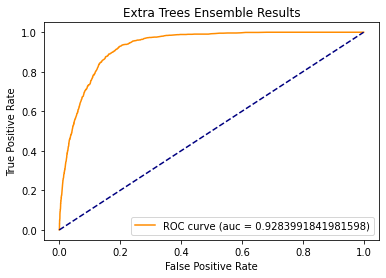

Extra Trees Ensemble Accuracy =0.9047882339931439
Extra Trees Ensemble--- 33.15107202529907 seconds ---


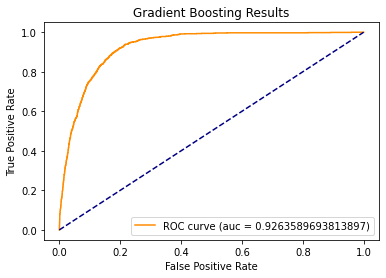

Gradient Boosting Accuracy =0.9037929890523057
Gradient Boosting--- 5.532031536102295 seconds ---


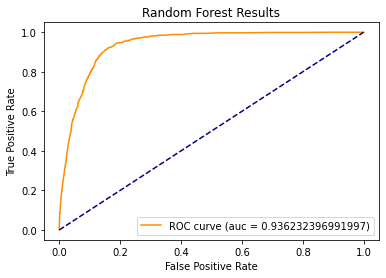

Random Forest Accuracy =0.9072210549596373
Random Forest--- 50.860597133636475 seconds ---


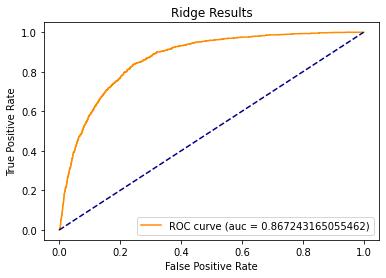

Ridge Accuracy =0.8862103284308305
Ridge--- 0.04157829284667969 seconds ---


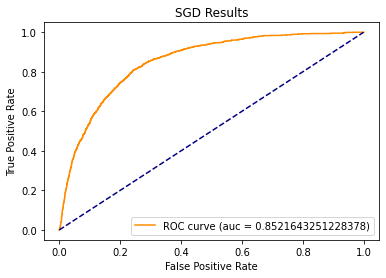

SGD Accuracy =0.8822293486674776
SGD--- 0.2504587173461914 seconds ---


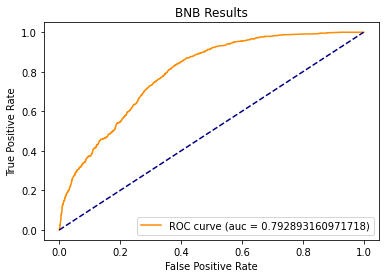

BNB Accuracy =0.8601127944266284
BNB--- 0.02644824981689453 seconds ---


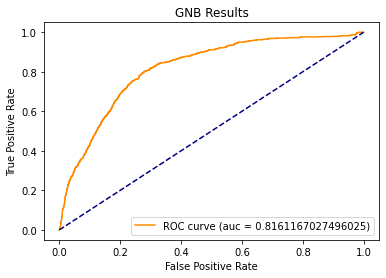

GNB Accuracy =0.83125069114232
GNB--- 0.020029067993164062 seconds ---


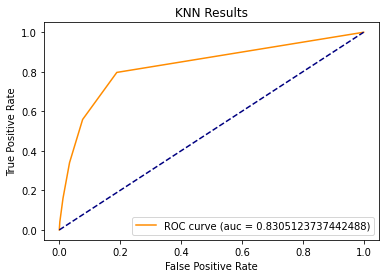

KNN Accuracy =0.8930664602454937
KNN--- 0.009428977966308594 seconds ---


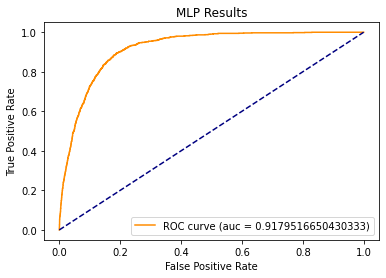

MLP Accuracy =0.9001437576025655
MLP--- 59.14113450050354 seconds ---


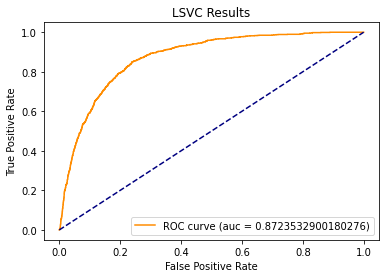

LSVC Accuracy =0.8877584872276899
LSVC--- 696.8067066669464 seconds ---


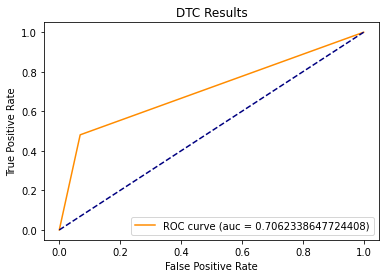

DTC Accuracy =0.8786906999889417
DTC--- 0.2750251293182373 seconds ---


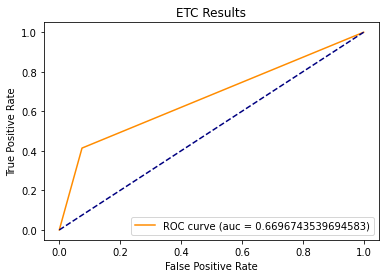

ETC Accuracy =0.8655313502156364
ETC--- 0.05018806457519531 seconds ---
Best model is Random Forest


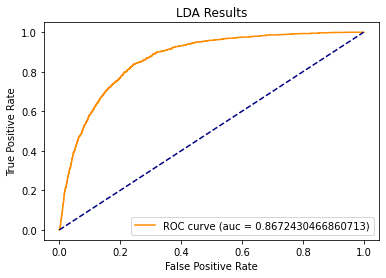

LDA Accuracy =0.8893066460245493
LDA--- 0.11744046211242676 seconds ---


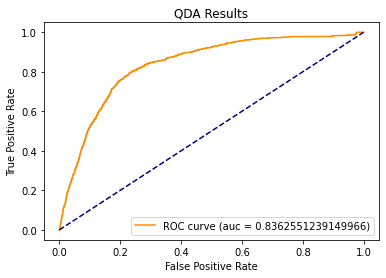

QDA Accuracy =0.8561318146632755
QDA--- 0.04630255699157715 seconds ---


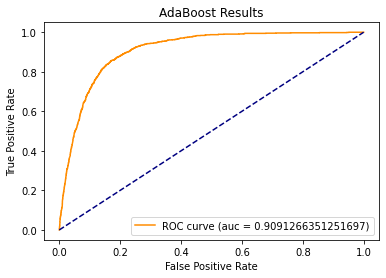

AdaBoost Accuracy =0.8960521950680084
AdaBoost--- 2.0299746990203857 seconds ---


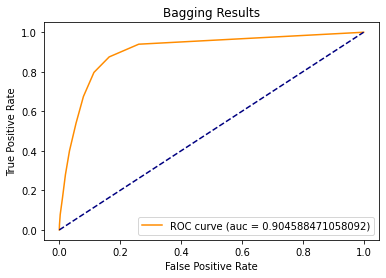

Bagging Accuracy =0.9002543403737697
Bagging--- 1.7209630012512207 seconds ---


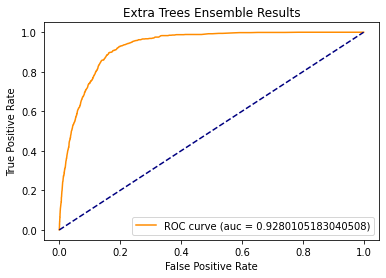

Extra Trees Ensemble Accuracy =0.9048988167643481
Extra Trees Ensemble--- 35.37612581253052 seconds ---


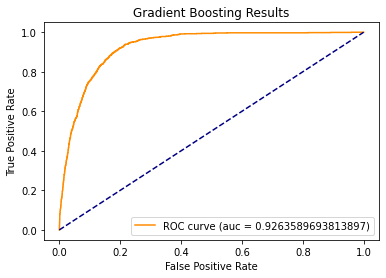

Gradient Boosting Accuracy =0.9037929890523057
Gradient Boosting--- 5.823580741882324 seconds ---


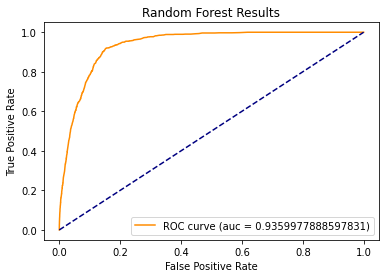

Random Forest Accuracy =0.9073316377308416
Random Forest--- 52.041414976119995 seconds ---


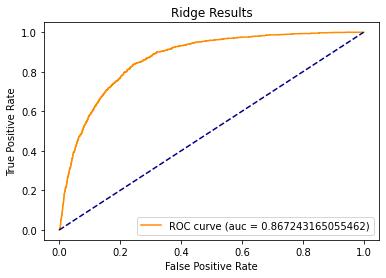

Ridge Accuracy =0.8862103284308305
Ridge--- 0.03805994987487793 seconds ---


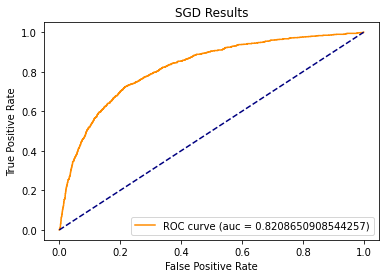

SGD Accuracy =0.8849939179475838
SGD--- 0.2610907554626465 seconds ---


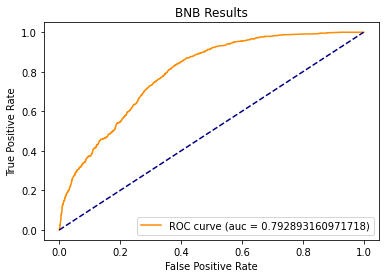

BNB Accuracy =0.8601127944266284
BNB--- 0.033113718032836914 seconds ---


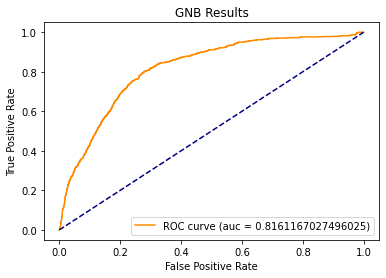

GNB Accuracy =0.83125069114232
GNB--- 0.02288508415222168 seconds ---


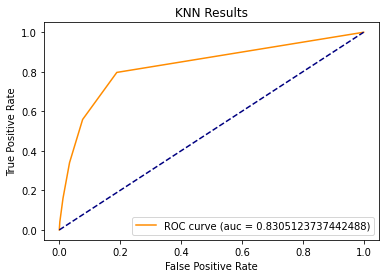

KNN Accuracy =0.8930664602454937
KNN--- 0.009547233581542969 seconds ---


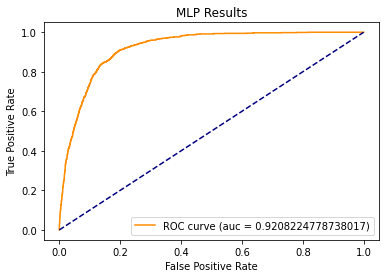

MLP Accuracy =0.9025765785690589
MLP--- 58.071709871292114 seconds ---


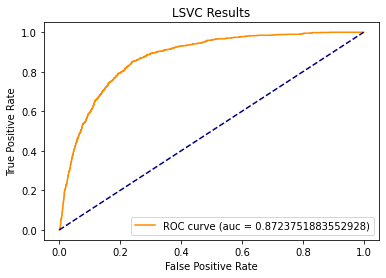

LSVC Accuracy =0.8877584872276899
LSVC--- 618.6168966293335 seconds ---


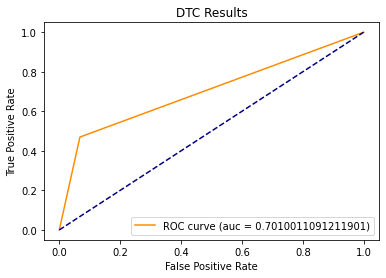

DTC Accuracy =0.8781377861329205
DTC--- 0.2696676254272461 seconds ---


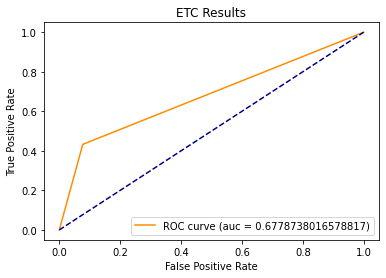

ETC Accuracy =0.8655313502156364
ETC--- 0.04405093193054199 seconds ---
Best model is Random Forest


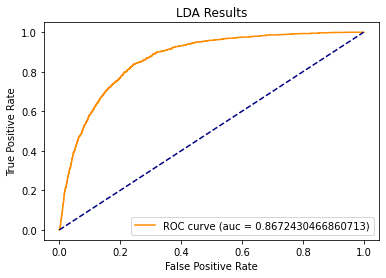

LDA Accuracy =0.8893066460245493
LDA--- 0.09957480430603027 seconds ---


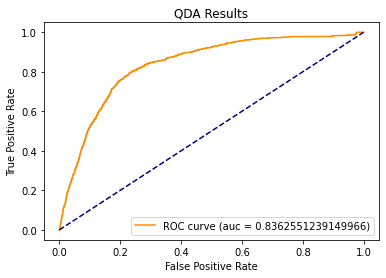

QDA Accuracy =0.8561318146632755
QDA--- 0.05127739906311035 seconds ---


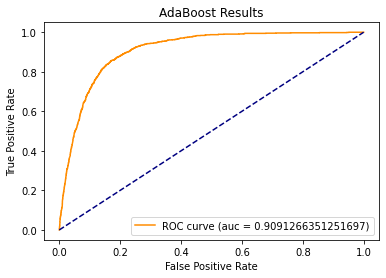

AdaBoost Accuracy =0.8960521950680084
AdaBoost--- 1.6588563919067383 seconds ---


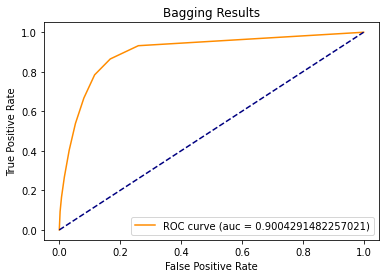

Bagging Accuracy =0.9014707508570164
Bagging--- 1.6590690612792969 seconds ---


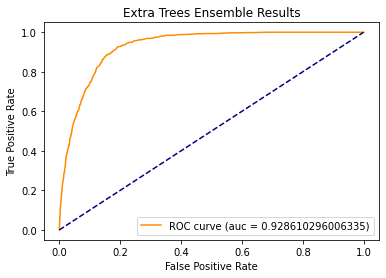

Extra Trees Ensemble Accuracy =0.9064469755612076
Extra Trees Ensemble--- 33.55332064628601 seconds ---


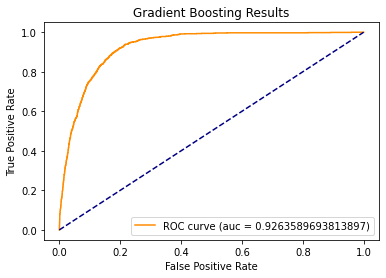

Gradient Boosting Accuracy =0.9037929890523057
Gradient Boosting--- 6.028167724609375 seconds ---


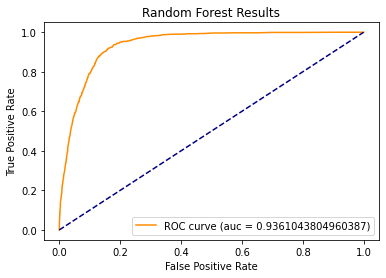

Random Forest Accuracy =0.9073316377308416
Random Forest--- 50.09941291809082 seconds ---


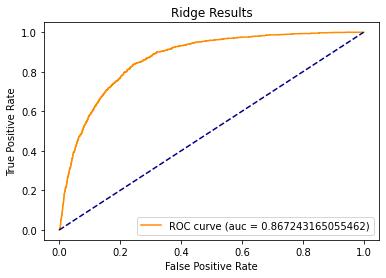

Ridge Accuracy =0.8862103284308305
Ridge--- 0.03898167610168457 seconds ---


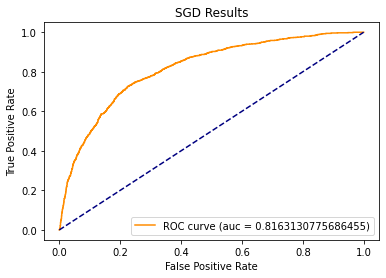

SGD Accuracy =0.8844410040915626
SGD--- 0.1802988052368164 seconds ---


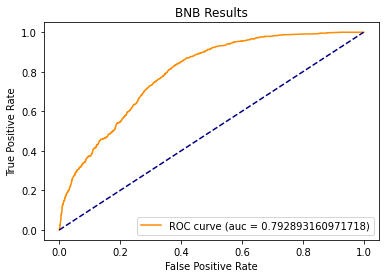

BNB Accuracy =0.8601127944266284
BNB--- 0.031136035919189453 seconds ---


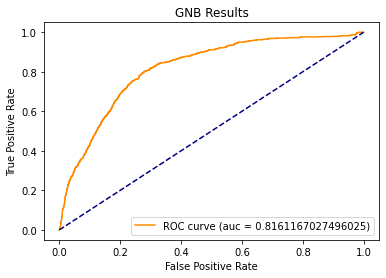

GNB Accuracy =0.83125069114232
GNB--- 0.01944708824157715 seconds ---


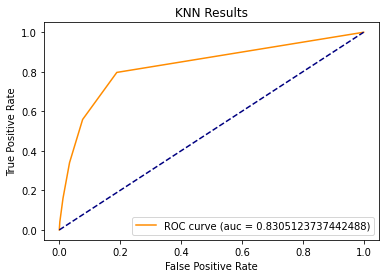

KNN Accuracy =0.8930664602454937
KNN--- 0.008295774459838867 seconds ---


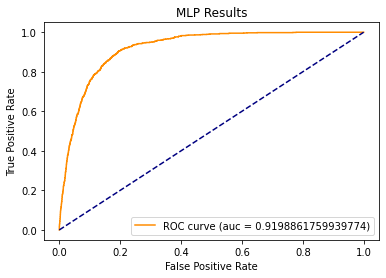

MLP Accuracy =0.9024659957978547
MLP--- 72.77637815475464 seconds ---


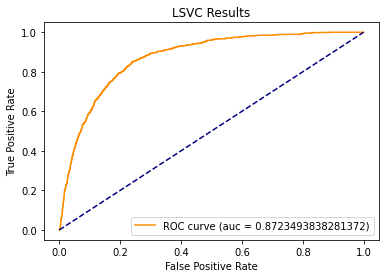

LSVC Accuracy =0.8877584872276899
LSVC--- 637.0225503444672 seconds ---


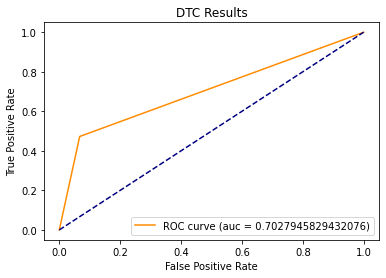

DTC Accuracy =0.8791330310737587
DTC--- 0.2680954933166504 seconds ---


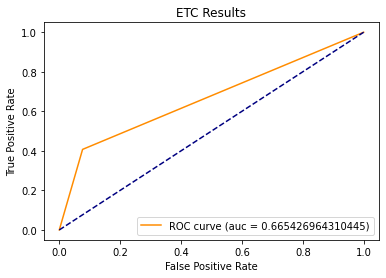

ETC Accuracy =0.863098529249143
ETC--- 0.042385101318359375 seconds ---
Best model is Random Forest


In [ ]:
#ML Model

models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('Bagging', BaggingClassifier()))
models.append(('Extra Trees Ensemble', ExtraTreesClassifier(n_estimators=1000)))
models.append(('Gradient Boosting', GradientBoostingClassifier(random_state=0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=1000)))
models.append(('Ridge', RidgeClassifier()))
models.append(('SGD', SGDClassifier(tol=1e-3, max_iter=10000)))
models.append(('BNB', BernoulliNB()))
models.append(('GNB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('MLP', MLPClassifier()))
models.append(('LSVC', LinearSVC(max_iter=100000)))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('ETC', ExtraTreeClassifier()))

DECISION_FUNCTIONS = {"Ridge", "SGD", "LSVC", "SVC"}

from sklearn.metrics import roc_auc_score, roc_curve
%matplotlib inline


best_model = None
best_model_name = ""
best_valid = 0
resultlist= pd.DataFrame([], columns=['model', 'runtime','Acc','repetition'])
for i in range(3):
  for name, model in models:
      start_time = time.time()
      model.fit(x_train, y_train)
      end_time = time.time()
      
      if name in DECISION_FUNCTIONS:
          proba = model.decision_function(x_test)
      else:
          proba = model.predict_proba(x_test)[:, 1]
      y_pred=model.predict(x_test)
      s=accuracy_score(y_test,y_pred) #f1_score(y_test, model.predict(x_test), average='weighted') 
      
      score =  roc_auc_score(y_test, proba)

      
      result = {'model': name, 'runtime': end_time - start_time, 'Acc': s,'repetition' : i}
      resultlist=resultlist.append(result, ignore_index = True)
  
      fpr, tpr, _  = roc_curve(y_test, proba)
      plt.figure()
      plt.plot(fpr, tpr, color='darkorange', label=f"ROC curve (auc = {score})")
      plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
      plt.title(f"{name} Results")
      plt.xlabel("False Positive Rate")
      plt.ylabel("True Positive Rate")
      plt.legend(loc="lower right")
      plt.show()
      print(  name+ " Accuracy =" + str(s))
      print(  name+ "--- %s seconds ---" % (end_time - start_time))
      
      if s > best_valid:
          best_valid = s
          best_model = model
          best_model_name = name

  print(f"Best model is {best_model_name}")

# Compare Machine Learning Result

In [ ]:
# Compare Machine Learning
print(resultlist[["model","Acc", "runtime"]].groupby("model").describe())
fig = px.scatter(resultlist, x="runtime", y="Acc", color="model",size="Acc", hover_data=['model' , 'repetition'],title='Accuracy vs Runtime for ML models')
fig.show()


fig = px.box(resultlist, x="model", y="Acc", points="all",title="Accuracy score for ML model")
fig.show()

fig = px.box(resultlist, x="model", y="runtime", points="all",title="Runtime for ML model")
fig.show()




                       Acc                                              \
                     count      mean           std       min       25%   
model                                                                    
AdaBoost               3.0  0.896052  0.000000e+00  0.896052  0.896052   
BNB                    3.0  0.860113  0.000000e+00  0.860113  0.860113   
Bagging                3.0  0.900365  1.054892e-03  0.899370  0.899812   
DTC                    3.0  0.878654  4.986453e-04  0.878138  0.878414   
ETC                    3.0  0.864720  1.404590e-03  0.863099  0.864315   
Extra Trees Ensemble   3.0  0.905378  9.274021e-04  0.904788  0.904844   
GNB                    3.0  0.831251  0.000000e+00  0.831251  0.831251   
Gradient Boosting      3.0  0.903793  0.000000e+00  0.903793  0.903793   
KNN                    3.0  0.893066  0.000000e+00  0.893066  0.893066   
LDA                    3.0  0.889307  0.000000e+00  0.889307  0.889307   
LSVC                   3.0  0.887758  

# Tune Gradient Boosting Model

In [ ]:
v_max_depth=range(1,15)

best_score=0
best_max_depth=0
for p_max_depth in v_max_depth:
  clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.00,max_depth=p_max_depth, random_state=0).fit(x_train, y_train)
  s=accuracy_score(y_test,clf.predict(x_test)) #clf.score(x_test, y_test)
  print('max_depth = '+str(p_max_depth)+ "   Acc="+str(s))
  if s>best_score:
    best_score=s
    best_max_depth=p_max_depth


max_depth = 1   Acc=0.9014707508570164
max_depth = 2   Acc=0.908879796527701
max_depth = 3   Acc=0.9020236647130377
max_depth = 4   Acc=0.9027977441114674
max_depth = 5   Acc=0.8988167643481145
max_depth = 6   Acc=0.8889748977109366
max_depth = 7   Acc=0.8876479044564857
max_depth = 8   Acc=0.8893066460245493
max_depth = 9   Acc=0.886431493973239
max_depth = 10   Acc=0.8833351763795201
max_depth = 11   Acc=0.8915183014486343
max_depth = 12   Acc=0.8970474400088466
max_depth = 13   Acc=0.8977109366360722
max_depth = 14   Acc=0.9006966714585868


In [ ]:

v_n_estimators=range(100,500,20)

best_score=0
best_n_estimators=0
for p_n_estimators in v_n_estimators:
  clf = GradientBoostingClassifier(n_estimators=p_n_estimators, learning_rate=1.00,max_depth=best_max_depth, random_state=0).fit(x_train, y_train)
  s= accuracy_score(y_test,clf.predict(x_test)) #clf.score(x_test, y_test)
  print('max_depth = '+str(best_max_depth)+'  n_estimator='+str(p_n_estimators)+ "   Acc="+str(s))
  if s>best_score:
    best_score=s
    best_n_estimators=p_n_estimators

max_depth = 2  n_estimator=100   Acc=0.908879796527701
max_depth = 2  n_estimator=120   Acc=0.9083268826716797
max_depth = 2  n_estimator=140   Acc=0.908879796527701
max_depth = 2  n_estimator=160   Acc=0.9091009620701095
max_depth = 2  n_estimator=180   Acc=0.910206789782152
max_depth = 2  n_estimator=200   Acc=0.9086586309852925
max_depth = 2  n_estimator=220   Acc=0.9074422205020458
max_depth = 2  n_estimator=240   Acc=0.9078845515868628
max_depth = 2  n_estimator=260   Acc=0.9074422205020458
max_depth = 2  n_estimator=280   Acc=0.9055623133915736
max_depth = 2  n_estimator=300   Acc=0.9063363927900033
max_depth = 2  n_estimator=320   Acc=0.9062258100187991
max_depth = 2  n_estimator=340   Acc=0.9063363927900033
max_depth = 2  n_estimator=360   Acc=0.906668141103616
max_depth = 2  n_estimator=380   Acc=0.9061152272475949
max_depth = 2  n_estimator=400   Acc=0.9064469755612076
max_depth = 2  n_estimator=420   Acc=0.906668141103616
max_depth = 2  n_estimator=440   Acc=0.90622581001879

In [ ]:
for i in range(3):
  start_time = time.time()
  clf = GradientBoostingClassifier(n_estimators=best_n_estimators, learning_rate=1.00,max_depth=best_max_depth).fit(x_train, y_train)
  s=clf.score(x_test, y_test)
  end_time = time.time()

  result = {'model': 'TunedGradientBoostingClassifier', 'runtime': end_time - start_time, 'Acc': s,'repetition' : i}
  resultlist=resultlist.append(result, ignore_index = True)
  print(confusion_matrix(y_test,clf.predict(x_test)))


[[7711  274]
 [ 535  523]]
[[7711  274]
 [ 535  523]]
[[7709  276]
 [ 535  523]]


# Compare ML Model after tune

In [ ]:
#Compare ML result after tune
print(resultlist[["model","Acc", "runtime"]].groupby("model").describe())

fig = px.scatter(resultlist, x="runtime", y="Acc", color="model",size="Acc", hover_data=['model' , 'repetition'],title='Accuracy vs Runtime for ML models')
fig.show()


fig = px.box(resultlist, x="model", y="Acc", points="all",title="Accuracy score for ML model")
fig.show()

fig = px.box(resultlist, x="model", y="runtime", points="all",title="Runtime for ML model")
fig.show()




                                  Acc                                    \
                                count      mean           std       min   
model                                                                     
AdaBoost                          3.0  0.896052  0.000000e+00  0.896052   
BNB                               3.0  0.860113  0.000000e+00  0.860113   
Bagging                           3.0  0.900365  1.054892e-03  0.899370   
DTC                               3.0  0.878654  4.986453e-04  0.878138   
ETC                               3.0  0.864720  1.404590e-03  0.863099   
Extra Trees Ensemble              3.0  0.905378  9.274021e-04  0.904788   
GNB                               3.0  0.831251  0.000000e+00  0.831251   
Gradient Boosting                 3.0  0.903793  0.000000e+00  0.903793   
KNN                               3.0  0.893066  0.000000e+00  0.893066   
LDA                               3.0  0.889307  0.000000e+00  0.889307   
LSVC                     

# Deep Learning Model

In [ ]:
!nvidia-smi -L
import tensorflow as tf
print( f"TensorFlow {tf.__version__}" )
print( f"tf.keras.backend.image_data_format() = {tf.keras.backend.image_data_format()}" )

# Count the number of GPUs as detected by tensorflow
gpus = tf.config.list_physical_devices('GPU')
print( f"TensorFlow detected { len(gpus) } GPU(s):" )
for i, gpu in enumerate(gpus):
  print( f".... GPU No. {i}: Name = {gpu.name} , Type = {gpu.device_type}" )

np.random.seed(1234)
tf.random.set_seed(5678)

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.

TensorFlow 2.8.2
tf.keras.backend.image_data_format() = channels_last
TensorFlow detected 0 GPU(s):


#Change data Type

In [ ]:
x_traindp = x_train.astype(np.float32)
x_testdp = x_test.astype(np.float32)

y_traindp = y_train.to_numpy()
y_testdp = y_test.to_numpy()

# Create the network architecture

In [ ]:
model = tf.keras.models.Sequential()

input_dim = x_train.shape[1]    
output_dim = 2

# Input layer
model.add( tf.keras.Input(shape=(input_dim,)) )

# Hidden layer
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden1') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn1') )  
model.add( tf.keras.layers.Dense(64, activation='relu', name='hidden2') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.BatchNormalization(axis=-1, name='bn2') )
model.add( tf.keras.layers.Dense(32, activation='relu', name='hidden3') )   # use default weight initialization, don't use any regularization
model.add( tf.keras.layers.Dropout(0.3) )                        # drop rate = 30%

# Output layer
model.add( tf.keras.layers.Dense(output_dim, activation='softmax', name='output') )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 32)                544       
                                                                 
 bn1 (BatchNormalization)    (None, 32)                128       
                                                                 
 hidden2 (Dense)             (None, 64)                2112      
                                                                 
 bn2 (BatchNormalization)    (None, 64)                256       
                                                                 
 hidden3 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 output (Dense)              (None, 2)                 6

# Compile the model

In [ ]:
#create function to calculate f1
from keras import backend as K
"""
def recall_m(y_true, y_pred):
    
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    #precision = precision_m(y_true, y_pred)
    #recall = recall_m(y_true, y_pred)
    f1=f1_score(y_true, np.argmax(y_pred,axis = 1), average='weighted') 
    return f1 #2*((precision*recall)/(precision+recall+K.epsilon()))
"""
# Compile with default values for both optimizer and loss
model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'] )
# Compile + hyperparameter tuning
model.compile( optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) , 
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) ,
                       metrics=['acc'] 
                     )

#Train Model

In [ ]:

for i in range(3):
  checkpoint_filepath = "bestmodel_epoch{epoch:02d}_valloss{val_loss:.2f}.hdf5"
  model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint( filepath=checkpoint_filepath,
                                                                                                save_weights_only=True,
                                                                                                monitor='val_acc',
                                                                                                mode='max',
                                                                                                save_best_only=True)

  start_time = time.time()
  history = model.fit ( x_traindp, y_traindp, batch_size=128, epochs=100, verbose=1, validation_split=0.3, callbacks=[model_checkpoint_callback] )
  end_time = time.time()

  y_pred = model.predict( x_testdp)
  s=accuracy_score(y_test,np.argmax(y_pred,axis = 1)) #f1_score(y_test, np.argmax(y_pred,axis = 1), average='weighted') 
  print(s)

  result = {'model': 'DeepLearningSoftMax', 'runtime': end_time - start_time, 'Acc': s,'repetition' : i}
  resultlist=resultlist.append(result, ignore_index = True)



Epoch 1/100
198/198 [==============================] - 5s 11ms/step - loss: 0.3135 - acc: 0.8733 - val_loss: 0.2555 - val_acc: 0.8906
Epoch 2/100
198/198 [==============================] - 4s 20ms/step - loss: 0.2554 - acc: 0.8909 - val_loss: 0.2394 - val_acc: 0.8963
Epoch 3/100
198/198 [==============================] - 1s 6ms/step - loss: 0.2419 - acc: 0.8946 - val_loss: 0.2373 - val_acc: 0.8971
Epoch 4/100
198/198 [==============================] - 1s 4ms/step - loss: 0.2350 - acc: 0.8966 - val_loss: 0.2329 - val_acc: 0.8984
Epoch 5/100
198/198 [==============================] - 1s 4ms/step - loss: 0.2302 - acc: 0.8996 - val_loss: 0.2292 - val_acc: 0.9001
Epoch 6/100
198/198 [==============================] - 1s 4ms/step - loss: 0.2258 - acc: 0.9000 - val_loss: 0.2290 - val_acc: 0.9012
Epoch 7/100
198/198 [==============================] - 1s 4ms/step - loss: 0.2230 - acc: 0.9022 - val_loss: 0.2257 - val_acc: 0.9009
Epoch 8/100
198/198 [==============================] - 1s 4ms/step 

In [ ]:
# Inspect the saved files (sorted by modification date, newest first)
!ls -lt

total 680
-rw-r--r-- 1 root root 47600 Aug 29 16:03 bestmodel_epoch14_valloss0.29.hdf5
-rw-r--r-- 1 root root 47600 Aug 29 16:03 bestmodel_epoch03_valloss0.30.hdf5
-rw-r--r-- 1 root root 47600 Aug 29 16:03 bestmodel_epoch02_valloss0.29.hdf5
-rw-r--r-- 1 root root 47600 Aug 29 16:03 bestmodel_epoch01_valloss0.29.hdf5
-rw-r--r-- 1 root root 47600 Aug 29 16:02 bestmodel_epoch02_valloss0.25.hdf5
-rw-r--r-- 1 root root 47600 Aug 29 16:02 bestmodel_epoch01_valloss0.25.hdf5
-rw-r--r-- 1 root root 47600 Aug 29 16:00 bestmodel_epoch13_valloss0.22.hdf5
-rw-r--r-- 1 root root 47600 Aug 29 16:00 bestmodel_epoch11_valloss0.22.hdf5
-rw-r--r-- 1 root root 47600 Aug 29 16:00 bestmodel_epoch06_valloss0.23.hdf5
-rw-r--r-- 1 root root 47600 Aug 29 16:00 bestmodel_epoch05_valloss0.23.hdf5
-rw-r--r-- 1 root root 47600 Aug 29 16:00 bestmodel_epoch04_valloss0.23.hdf5
-rw-r--r-- 1 root root 47600 Aug 29 16:00 bestmodel_epoch03_valloss0.24.hdf5
-rw-r--r-- 1 root root 47600 Aug 29 16:00 bestmodel_epoch02_vallos

In [ ]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

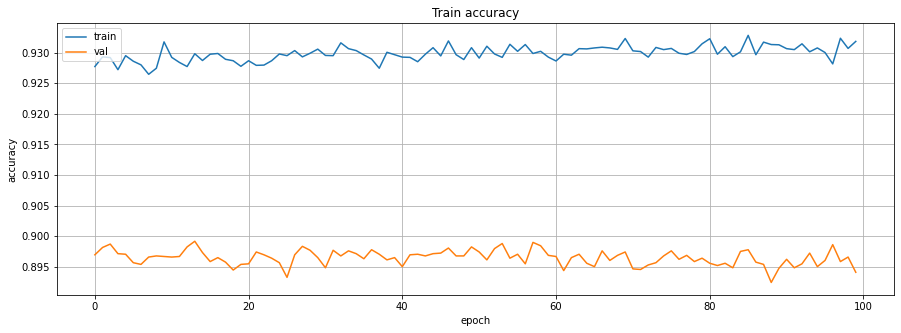

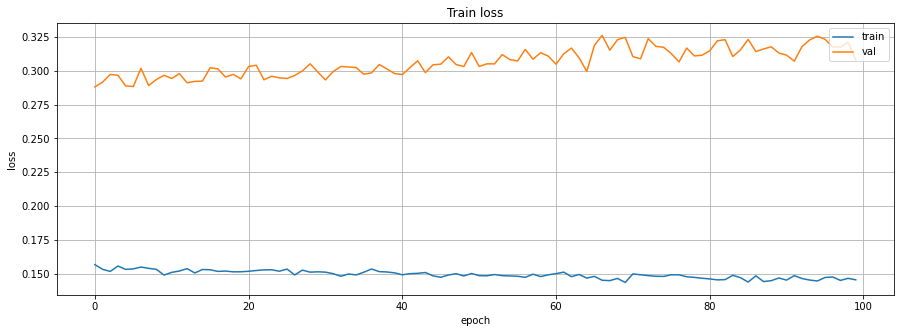

In [ ]:
# Summarize history for accuracy
plt.figure(figsize=(15,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

# Summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.grid()
plt.show()

#Evaluate the model on test set

In [ ]:
results = model.evaluate(x_testdp, y_testdp, batch_size=128)
print( f"{model.metrics_names} = {results}" )

71/71 [==============================] - 0s 4ms/step - loss: 0.2902 - acc: 0.8954
['loss', 'acc'] = [0.2902034819126129, 0.8953887224197388]


#Inference

In [ ]:
# Test using the model on x_test[i]
i = 0
y_pred = model.predict( x_testdp[i].reshape(1,-1) )   # reshape x_test[i] from (n_feature,) to (1, n_feature)

print( f"{'#'*10} Input: x_testdp[{i}] {'#'*10}" )
print( f"shape={x_testdp[i].shape}\nvalue={x_testdp[i]}\n" )

print( f"{'#'*10} Ground truth: y_testdp[{i}] {'#'*10}" )
print( f"shape={y_testdp[i].shape}\nvalue={y_testdp[i]}\n" )

print( f"{'#'*10} Prediction: y_pred {'#'*10}" )
print( f"type={type(y_pred)}\ndtype={y_pred.dtype}\nshape={y_pred.shape}" )
print( f"value={y_pred}" )
print( f"np.argmax(y_pred)={np.argmax(y_pred)}" )

########## Input: x_testdp[0] ##########
shape=(16,)
value=[ 0.66480935 -0.40587258 -0.27663603  1.0356073  -0.13527964 -0.2895458
  0.89755297 -0.43563285  1.510015   -0.21393974 -0.47683692 -0.14916594
 -0.56740093 -0.4093585  -0.24303979  0.442394  ]

########## Ground truth: y_testdp[0] ##########
shape=(1,)
value=[0]

########## Prediction: y_pred ##########
type=<class 'numpy.ndarray'>
dtype=float32
shape=(1, 2)
value=[[1.0000000e+00 1.4062054e-11]]
np.argmax(y_pred)=0


#Compare all ML and DL Models

In [ ]:
#Compare ML result after tune
print(resultlist[["model","Acc", "runtime"]].groupby("model").describe())

fig = px.scatter(resultlist, x="runtime", y="Acc", color="model",size="Acc", hover_data=['model' , 'repetition'],title='Accuracy vs Runtime for ML models')
fig.show()


fig = px.box(resultlist, x="model", y="Acc", points="all",title="Acc score for ML model")
fig.show()

fig = px.box(resultlist, x="model", y="runtime", points="all",title="Runtime for ML model")
fig.show()

                                  Acc                                    \
                                count      mean           std       min   
model                                                                     
AdaBoost                          3.0  0.896052  0.000000e+00  0.896052   
BNB                               3.0  0.860113  0.000000e+00  0.860113   
Bagging                           3.0  0.900365  1.054892e-03  0.899370   
DTC                               3.0  0.878654  4.986453e-04  0.878138   
DeepLearningSoftMax               3.0  0.896568  1.588445e-03  0.895389   
ETC                               3.0  0.864720  1.404590e-03  0.863099   
Extra Trees Ensemble              3.0  0.905378  9.274021e-04  0.904788   
GNB                               3.0  0.831251  0.000000e+00  0.831251   
Gradient Boosting                 3.0  0.903793  0.000000e+00  0.903793   
KNN                               3.0  0.893066  0.000000e+00  0.893066   
LDA                      